In [1]:
import numpy as np
import random

In [2]:
def sample_gmm_2d(K, C, N):
    X = np.zeros((K*N, 2), dtype=float)
    Y = np.zeros((K*N), dtype=float)
    for i in range(K):
        mean = np.random.uniform(-10, 10)
        sigma = np.random.uniform(0, 5)
        c_i = random.sample(range(C), 1)
        for j in range(N):
            X[i*N+j] = np.random.uniform(mean, sigma, 2)
            Y[i*N+j] = c_i[0]
    return (X, Y)

In [3]:
(X, Y) = sample_gmm_2d(4, 2, 30)
print(Y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
import matplotlib
import matplotlib.pyplot as plt

def graph_data(X, Y_, Y):
    X_correct_0 = X[np.logical_and(Y == Y_, Y_ == np.zeros(Y_.shape)), :]
    X_correct_1 = X[np.logical_and(Y == Y_, Y_ == np.ones(Y_.shape)), :]
    X_wrong_0 = X[np.logical_and(Y != Y_, Y_ == np.zeros(Y_.shape)), :]
    X_wrong_1 = X[np.logical_and(Y != Y_, Y_ == np.ones(Y_.shape)), :]
    plt.scatter(X_correct_0[:, 0], X_correct_0[:, 1], marker='o', c='gray')
    plt.scatter(X_correct_1[:, 0], X_correct_1[:, 1], marker='o', c='white')
    plt.scatter(X_wrong_0[:, 0], X_wrong_0[:, 1], marker='s', c='gray')
    plt.scatter(X_wrong_1[:, 0], X_wrong_1[:, 1], marker='s', c='white')

In [5]:
def myDummyDecision(X):
    score = X[:,0] + X[:,1] - 5
    return score

(array([-8.47068684, -7.74611303]), array([ 5.66353616,  5.80000765]))


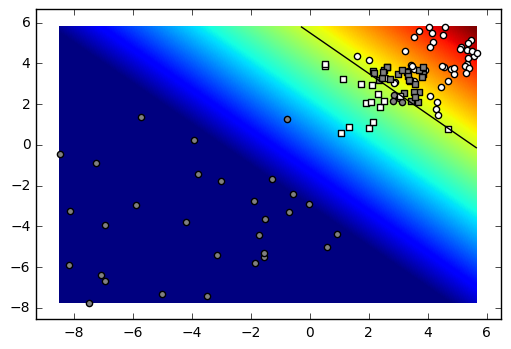

In [6]:
def graph_surface(fun, rect, offset=0.0, width=1000, height=1000):
    x1 = np.linspace(rect[0][0], rect[1][0], height)
    x2 = np.linspace(rect[0][1], rect[1][1], width)
    xx, yy = np.meshgrid(x1, x2)
    h = fun(np.stack([xx.flatten(), yy.flatten()], axis=1))
    h = h.reshape(xx.shape)
    plt.contour(xx, yy, h, colors='black', levels=[offset])
    norm = matplotlib.colors.Normalize(vmin=offset+min(rect[0][0], rect[0][1]),vmax=offset+max(rect[1][0], rect[1][1]))
    plt.pcolormesh(xx, yy, h, norm=norm)
    graph_data(X, Y, fun(X) > offset)
    plt.show()

bbox = (np.min(X, axis=0), np.max(X, axis=0))
print(bbox)
graph_surface(myDummyDecision, bbox, offset=0.5)

iteration 0: loss 6.705277213732194
iteration 10: loss 6.644453951714342
iteration 20: loss 6.583948706407049
iteration 30: loss 6.523759031174743
iteration 40: loss 6.463882518844866
iteration 50: loss 6.404316802887711
iteration 60: loss 6.345059558574714
iteration 70: loss 6.2861085041135825
iteration 80: loss 6.227461401758073
iteration 90: loss 6.16911605888985
iteration 100: loss 6.111070329069245
iteration 110: loss 6.053322113051136
iteration 120: loss 5.99586730150301
iteration 130: loss 5.93874093996665
iteration 140: loss 5.881905497486349
iteration 150: loss 5.825359072451208
iteration 160: loss 5.769099814605247
iteration 170: loss 5.713125927731875
iteration 180: loss 5.657435665603472
iteration 190: loss 5.602027335206356
iteration 200: loss 5.546899297861304
iteration 210: loss 5.492049968834419
iteration 220: loss 5.4374778175571405
iteration 230: loss 5.383181367729178
iteration 240: loss 5.32915919729756
iteration 250: loss 5.275409938306211
iteration 260: loss 5.221

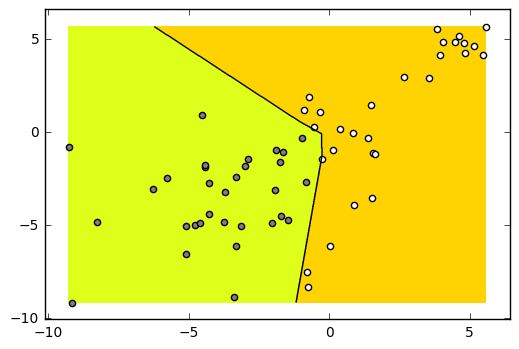

In [7]:
import data
import fcann2

(X, Y_) = data.sample_gmm_2d(6, 2, 10)
W1, b1, W2, b2 = fcann2.fcann2_train(X, Y_)
classify = fcann2.fcann2_classify(W1, b1, W2, b2)
Y = classify(X)
bbox = (np.min(X, axis=0), np.max(X, axis=0))
graph_surface(classify, bbox)

In [9]:
import tensorflow as tf
import tf_logreg

N, D = X.shape
C = 2
Yoh_ = np.zeros((N, C))
Yoh_[range(N), Y_.astype(int)] = 1
model = tf_logreg.TFLogReg(D, C)
model.train(X, Yoh_, 1000)
probs = model.eval(X)
# graph_surface(model.eval, bbox)

0 0.693147
10 2.45784
20 1.96318
30 0.849585
40 0.667446
50 0.894172
60 1.35059
70 0.747593
80 0.729777
90 1.64858
100 0.703341
110 0.696114
120 1.83054
130 0.671329
140 0.699127
150 1.57722
160 0.929891
170 0.666258
180 0.854725
190 1.39647
200 0.738935
210 0.723826
220 1.67128
230 0.74544
240 0.694295
250 1.85429
260 0.651948
270 0.702597
280 1.41015
290 1.01669
300 0.664846
310 0.815385
320 1.45143
330 0.688404
340 0.718692
350 1.69376
360 0.777212
370 0.691784
380 1.87824
390 0.65372
400 0.705712
410 1.25353
420 1.09752
430 0.673962
440 0.799243
450 1.4781
460 0.667054
470 0.712741
480 1.7228
490 0.782319
500 0.689427
510 1.8893
520 0.672113
530 0.708048
540 1.13793
550 1.1621
560 0.710616
570 0.780162
580 1.51434
590 0.657725
600 0.706593
610 1.75525
620 0.784507
630 0.686338
640 1.87166
650 0.722399
660 0.691248
670 1.07466
680 1.20142
690 0.732618
700 0.76255
710 1.55367
720 0.658892
730 0.702619
740 1.77857
750 0.769539
760 0.684423
770 1.8315
780 0.766881
790 0.67391
800 0.990